In [1]:
# imports
from datasets import load_dataset
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

c:\Users\jenni\anaconda3\envs\nlpenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Load Data

In [2]:
# load train dataset, print number of samples and features
dataset_train = load_dataset('Falah/Alzheimer_MRI', split='train')
dataset_train = dataset_train.to_pandas()
print("Number of examples:", len(dataset_train))
print("Sample data:")
for example in dataset_train[:5]:
    print(example)

Number of examples: 5120
Sample data:
image
label


In [3]:
# load test dataset, print number of samples and features
dataset_test = load_dataset('Falah/Alzheimer_MRI', split='test')
dataset_test = dataset_test.to_pandas()
print("Number of examples:", len(dataset_test))
print("Sample data:")
for example in dataset_test[:5]:
    print(example)

Number of examples: 1280
Sample data:
image
label


In [4]:
# categories
disease_label_from_category = {
    0: "Mild Demented",
    1: "Moderate Demented",
    2: "Non Demented",
    3: "Very Mild Demented",
}

In [5]:
# show train dataset
dataset_train.head()

,image,label
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2


In [6]:
# show test dataset
dataset_test.head()

,image,label
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0


In [7]:
# convert bytes to image values representing intensity of pixels
def dict_to_image(image_dict):
    if isinstance(image_dict, dict) and 'bytes' in image_dict:
        byte_string = image_dict['bytes']
        nparr = np.frombuffer(byte_string, np.uint8)
        img = cv2.imdecode(nparr, cv2.IMREAD_GRAYSCALE)
        return img
    else:
        raise TypeError(f"Expected dictionary with 'bytes' key, got {type(image_dict)}")

In [8]:
# convert train
dataset_train['img_arr'] = dataset_train['image'].apply(dict_to_image)
dataset_train.drop("image", axis=1, inplace=True)
dataset_train.head()

,label,img_arr
0,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [26]:
# view example array representation of image
example_array = dataset_train['img_arr'][1]
example_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [27]:
# flatten array, view range of array values
flattened_array = [item for sublist in example_array for item in sublist]
print(min(flattened_array))
print(max(flattened_array))

0
255


In [ ]:
# plot max pixel values across images, general sense of range


In [17]:
# convert test
dataset_test['img_arr'] = dataset_test['image'].apply(dict_to_image)
dataset_test.drop("image", axis=1, inplace=True)
dataset_test.head()

,label,img_arr
0,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


Visualize Data

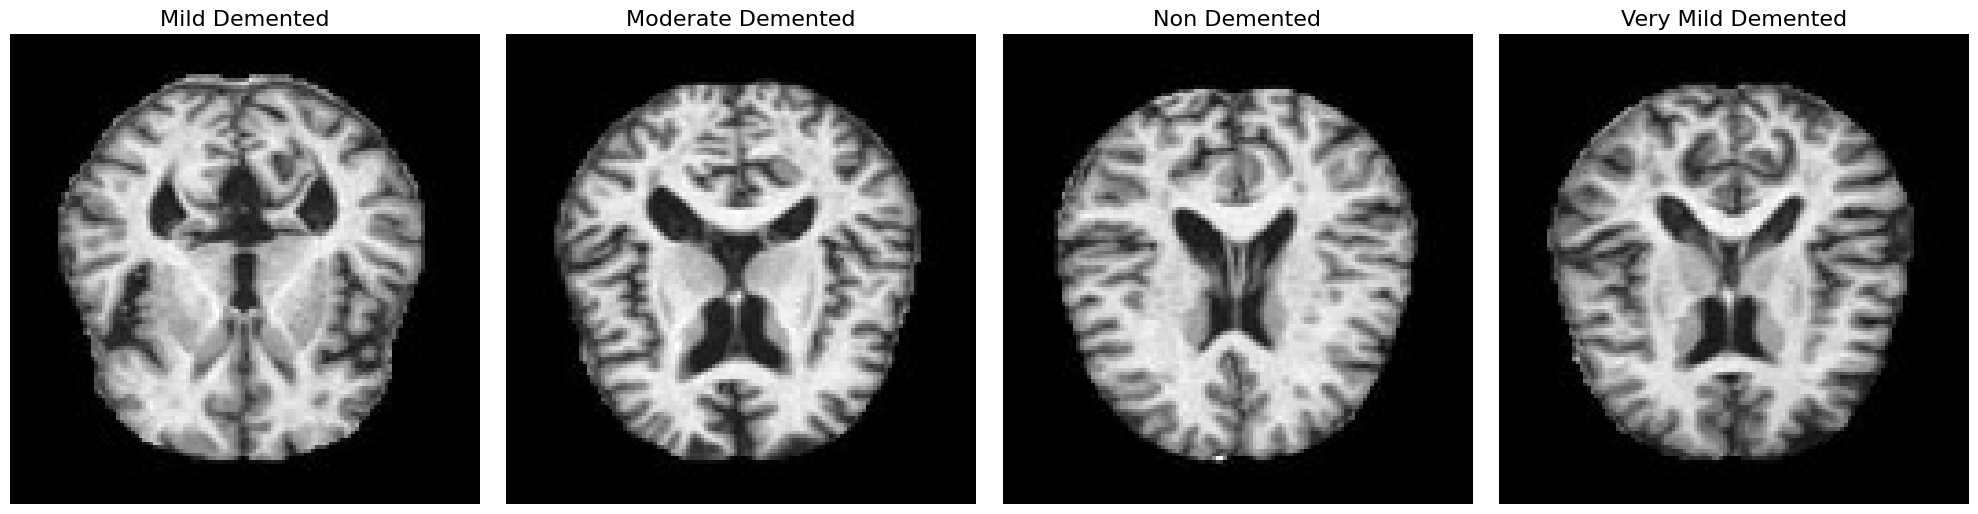

In [18]:
# visualize one in each category
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
axs = ax.flatten()
for label in range(4):
    matching_rows = dataset_train[dataset_train['label'] == label]
    if not matching_rows.empty:
        img_data = matching_rows.iloc[0]['img_arr']
        axs[label].imshow(img_data, cmap="gray")
        axs[label].set_title(disease_label_from_category[label], fontsize=16)
        axs[label].axis('off')
    else:
        axs[label].imshow(np.zeros((10, 10)), cmap="gray")
        axs[label].set_title(f"No data for label {label}", fontsize=16)
        axs[label].axis('off')
plt.tight_layout()
plt.show()

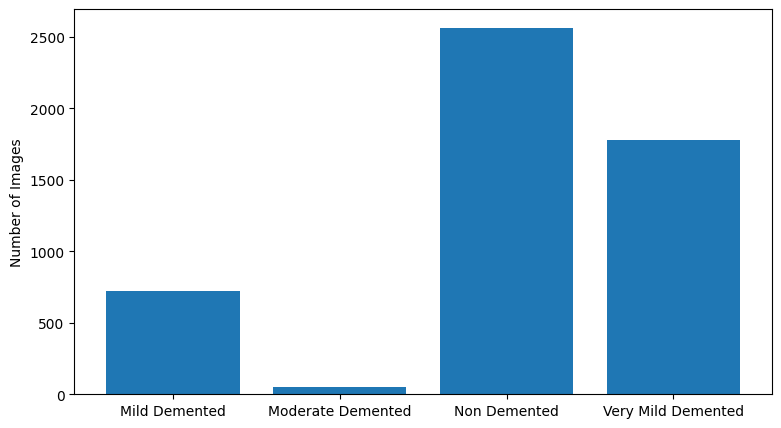

In [18]:
# plot count of images in each category
plt.figure(figsize=(9, 5))
plt.bar(np.arange(0, 4, 1), dataset_train['label'].value_counts().sort_index())
plt.ylabel("Number of Images")
plt.xticks(np.arange(0, 4, 1), labels=[disease_label_from_category[i] for i in range(4)])
plt.show()